In [39]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import statistics as st
import haversine
from shapely.geometry import Point
from shapely.geometry import shape, Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import MultiPoint

In [41]:
df1 = pd.read_csv('../input/mydata/dataset.csv')

In [42]:
df1.head()

,Unnamed: 0,transit_station,department_store,administrative_area_level_1,subway_station,synagogue,train_station,post_box,postal_code_suffix,meal_takeaway,physiotherapist,neighborhood,postal_code,accounting,museum,post_office,car_repair,city_hall,funeral_home,atm,library,casino,street_address,lodging,home_goods_store,storage,natural_feature,painter,amusement_park,sublocality_level_2,geocode,political,fire_station,floor,place_of_worship,plumber,route,real_estate_agency,clothing_store,electronics_store,...,locality,bakery,cemetery,postal_town,hindu_temple,movie_rental,pharmacy,rv_park,liquor_store,aquarium,supermarket,veterinary_care,airport,spa,food,car_rental,laundry,pet_store,embassy,meal_delivery,administrative_area_level_5,car_dealer,room,point_of_interest,intersection,cafe,doctor,hair_care,country,bank,florist,moving_company,stadium,furniture_store,courthouse,sublocality_level_1,administrative_area_level_2,shopping_mall,police,price
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,19.047619
1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,28.000000
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.333334
3,3,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,22.838500
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,22.500000


In [43]:
df1=df1.iloc[:,1:]

In [44]:
df1.head()

,transit_station,department_store,administrative_area_level_1,subway_station,synagogue,train_station,post_box,postal_code_suffix,meal_takeaway,physiotherapist,neighborhood,postal_code,accounting,museum,post_office,car_repair,city_hall,funeral_home,atm,library,casino,street_address,lodging,home_goods_store,storage,natural_feature,painter,amusement_park,sublocality_level_2,geocode,political,fire_station,floor,place_of_worship,plumber,route,real_estate_agency,clothing_store,electronics_store,sublocality_level_3,...,locality,bakery,cemetery,postal_town,hindu_temple,movie_rental,pharmacy,rv_park,liquor_store,aquarium,supermarket,veterinary_care,airport,spa,food,car_rental,laundry,pet_store,embassy,meal_delivery,administrative_area_level_5,car_dealer,room,point_of_interest,intersection,cafe,doctor,hair_care,country,bank,florist,moving_company,stadium,furniture_store,courthouse,sublocality_level_1,administrative_area_level_2,shopping_mall,police,price
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,19.047619
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,...,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,28.000000
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.333334
3,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,22.838500
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,22.500000


In [45]:
X = df1.iloc[:, :128]
Y = df1["price"]

In [46]:
X.describe()

,transit_station,department_store,administrative_area_level_1,subway_station,synagogue,train_station,post_box,postal_code_suffix,meal_takeaway,physiotherapist,neighborhood,postal_code,accounting,museum,post_office,car_repair,city_hall,funeral_home,atm,library,casino,street_address,lodging,home_goods_store,storage,natural_feature,painter,amusement_park,sublocality_level_2,geocode,political,fire_station,floor,place_of_worship,plumber,route,real_estate_agency,clothing_store,electronics_store,sublocality_level_3,...,parking,locality,bakery,cemetery,postal_town,hindu_temple,movie_rental,pharmacy,rv_park,liquor_store,aquarium,supermarket,veterinary_care,airport,spa,food,car_rental,laundry,pet_store,embassy,meal_delivery,administrative_area_level_5,car_dealer,room,point_of_interest,intersection,cafe,doctor,hair_care,country,bank,florist,moving_company,stadium,furniture_store,courthouse,sublocality_level_1,administrative_area_level_2,shopping_mall,police
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.0,22500.000000,22500.0,22500.0,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.0,22500.0,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.0,22500.000000,22500.000000,22500.0,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,22500.0,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.0,22500.000000,22500.0,22500.000000,22500.0,22500.000000,22500.000000,22500.000000,22500.0,22500.000000,22500.000000,22500.0000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,0.285689,0.106889,0.000222,0.013822,0.0,0.007244,0.0,0.0,0.184622,0.105067,0.283956,0.134044,0.160000,0.033022,0.081333,0.288933,0.001422,0.002044,0.330133,0.070000,0.0,0.0,0.453778,0.464222,0.082622,0.129511,0.063689,0.004356,0.340533,0.0,0.517378,0.016800,0.0,0.559778,0.022756,0.537556,0.158311,0.405422,0.406889,0.262222,...,0.044311,0.059556,0.193911,0.040756,0.0,0.343511,0.007956,0.386844,0.006489,0.074489,0.011733,0.118978,0.056844,0.003111,0.148844,0.559778,0.061467,0.201778,0.072178,0.007600,0.060933,0.0,0.087911,0.0,0.557556,0.0,0.271511,0.369111,0.264400,0.0,0.314133,0.067067,0.0440,0.005244,0.275556,0.011644,0.147467,0.000844,0.311822,0.050133
std,0.451752,0.308979,0.014906,0.116755,0.0,0.084807,0.0,0.0,0.387999,0.306646,0.450926,0.340708,0.366614,0.178699,0.273352,0.453277,0.037686,0.045170,0.470271,0.255153,0.0,0.0,0.497870,0.498729,0.275316,0.335772,0.244203,0.065854,0.473899,0.0,0.499709,0.128524,0.0,0.496425,0.149127,0.498599,0.365041,0.490984,0.491265,0.439853,...,0.205790,0.236667,0.395369,0.197728,0.0,0.474891,0.088840,0.487038,0.080294,0.262571,0.107686,0.323770,0.231550,0.055692,0.355943,0.496425,0.240190,0.401336,0.258788,0.086848,0.239213,0.0,0.283172,0.0,0.496687,0.0,0.444749,0.482575,0.441023,0.0,0.464180,0.250143,0.2051,0.072230,0.446804,0.107282,0.354578,0.029048,0.463248,0.218225
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000

In [47]:
df1.corr()


,transit_station,department_store,administrative_area_level_1,subway_station,synagogue,train_station,post_box,postal_code_suffix,meal_takeaway,physiotherapist,neighborhood,postal_code,accounting,museum,post_office,car_repair,city_hall,funeral_home,atm,library,casino,street_address,lodging,home_goods_store,storage,natural_feature,painter,amusement_park,sublocality_level_2,geocode,political,fire_station,floor,place_of_worship,plumber,route,real_estate_agency,clothing_store,electronics_store,sublocality_level_3,...,locality,bakery,cemetery,postal_town,hindu_temple,movie_rental,pharmacy,rv_park,liquor_store,aquarium,supermarket,veterinary_care,airport,spa,food,car_rental,laundry,pet_store,embassy,meal_delivery,administrative_area_level_5,car_dealer,room,point_of_interest,intersection,cafe,doctor,hair_care,country,bank,florist,moving_company,stadium,furniture_store,courthouse,sublocality_level_1,administrative_area_level_2,shopping_mall,police,price
transit_station,1.000000,0.286239,-0.009429,0.187201,NaN,0.135076,NaN,NaN,0.424800,0.368857,0.327007,0.215817,0.274141,0.180992,0.279731,0.549096,0.051843,0.067213,0.489328,0.225206,NaN,NaN,0.593462,0.555719,0.162564,0.280564,0.347535,0.080680,0.406098,NaN,0.571034,0.205164,NaN,0.560830,0.204344,0.586572,0.292534,0.493542,0.547849,0.265160,...,0.275279,0.427158,0.246317,NaN,0.481255,0.059649,0.474192,-0.049884,0.351544,0.075447,0.273251,0.276020,0.054769,0.225338,0.560830,0.279318,0.269166,0.255879,0.096460,0.271585,NaN,0.281746,NaN,0.563363,NaN,0.518255,0.380918,0.424856,NaN,0.636034,0.266631,0.166537,0.067138,0.372301,0.152374,0.248641,-0.018385,0.548931,0.232974,0.086314
department_store,0.286239,1.000000,-0.005158,0.095802,NaN,0.004371,NaN,NaN,0.302152,0.268007,0.299896,0.311430,0.431296,0.245183,0.329634,0.362455,-0.005422,-0.002920,0.428249,0.397266,NaN,NaN,0.361065,0.364158,0.226390,0.248277,0.179561,-0.022881,0.260750,NaN,0.314266,0.293908,NaN,0.306790,0.363922,0.316544,0.451307,0.384966,0.314902,0.195359,...,0.094679,0.513971,0.352104,NaN,0.352241,0.046741,0.386514,-0.027958,0.306168,-0.027009,0.300281,0.381624,-0.019326,0.408593,0.306790,0.088142,0.384851,0.409897,0.011134,0.024929,NaN,0.291372,NaN,0.308176,NaN,0.410127,0.397138,0.437109,NaN,0.413564,0.490939,0.223160,0.000771,0.454689,0.262801,0.271141,-0.010057,0.359918,0.237588,-0.007969
administrative_area_level_1,-0.009429,-0.005158,1.000000,-0.001765,NaN,-0.001274,NaN,NaN,-0.007094,-0.005108,-0.009389,-0.005866,-0.006507,-0.002755,-0.004436,0.023388,-0.000563,-0.000675,0.021237,-0.004090,NaN,NaN,0.016357,0.016017,-0.004474,-0.005751,-0.003888,-0.000986,0.020747,NaN,0.014399,-0.001949,NaN,0.013221,-0.002275,0.013828,-0.006466,0.018055,0.018000,-0.008888,...,-0.003752,-0.007312,-0.003073,NaN,0.020610,-0.001335,0.018770,-0.001205,-0.004230,-0.001624,-0.005479,-0.003660,-0.000833,0.035652,0.013221,-0.003815,-0.007496,-0.004158,-0.001305,-0.003798,NaN,-0.004629,NaN,0.013281,NaN,0.024421,-0.011404,0.024868,NaN,0.022030,-0.003997,-0.003198,-0.001083,-0.009195,-0.001618,-0.006201,-0.000433,0.022148,-0.003425,0.000927
subway_station,0.187201,0.095802,-0.001765,1.000000,NaN,0.102106,NaN,NaN,0.057477,0.000403,0.099356,0.069623,0.040746,0.046291,0.033013,0.040431,0.005633,-0.005359,0.145165,0.086877,NaN,NaN,0.103128,0.028721,0.086149,-0.010519,0.092274,-0.007830,0.062733,NaN,0.113582,-0.003628,NaN,0.104988,0.122335,0.109807,0.080054,0.130190,0.036775,0.097321,...,-0.029792,0.072882,-0.022478,NaN,0.031398,-0.010602,0.048219,-0.009568,0.008458,0.011846,-0.014112,0.113968,-0.006614,0.075624,0.104988,0.144043,0.038176,0.025820,-0.010360,-0.020609,NaN,0.034495,NaN,0.105462,NaN,0.062107,0.137423,0.047278,NaN,0.151151,0.073265,-0.012406,-0.003326,0.075234,-0.005753,0.081743,-0.003442,0.041107,0.073979,-0.070586
synagogue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=10)

In [51]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  36.35624111473805


In [53]:
predicted_house_price = model.predict(x_test)

In [55]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})

In [56]:
predicted_dataframe.head()

,Predicted_Prices,Actual_Prices
10206,3516.975496,5100.0000
14705,5510.226929,4500.0000
11915,3542.808741,5279.8310
21604,3542.808741,4071.8562
7245,3516.975496,3329.3618


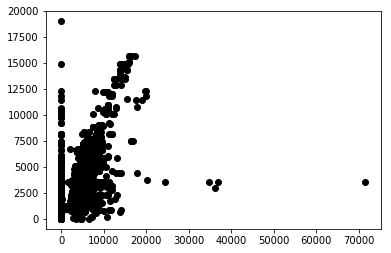

In [57]:
plt.scatter(y_test, predicted_house_price, color='black')
plt.show()